In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
import jieba
jieba.set_dictionary("dict.txt")

data = pd.read_csv("data.csv", header=0)
#data.info()

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
df = data.copy()
mask = (df.分類.str.contains("眼"))
celect_df = df[mask].query("分數 > 4")
celect_df.sort_values(by="分數", ascending=False)

,產品名,分數,產品圖片,品牌,分類,評論1,評論2,評論3,評論4,評論5,評論6,評論7,評論8,評論9,評論10
457,晶巧光燦眼盒 LIGHTING FOR EYES,6.2,https://dg9ugnb21lig7.cloudfront.net/uploads/p...,Kanebo 佳麗寶-專櫃,眼影盤,這一盒是2017年的聖誕節組合(拖到現在才寫哈) 每年LUNASOL都會推出類似的這樣的組...,今天要來分享的是風評聽說很棒的LUNASOL光燦眼影盤，這盤是前些年的周年慶組合買的，有...,到日本，就是要買「巧克力波斯菊」啊！不然要幹嘛？ 沒錯！只要你會畫眼妝，或想要買眼影送給女性...,第一次接觸眼影就是接觸他們家的 我選擇了最基本色的大地色~ 這絕對是新手的入門色 他的眼...,分享Lunasol高人氣款-貓眼石 （照片皆實際呈現無修圖） 最近有幸入手了這盒眼影，...,"這次用的是鼎鼎有名的 "" 巧 克 力 波 斯 菊 "" 是我入手lunasol眼影的第...",最近的新歡就是Lunasol的眼影很美而且飽和度也夠但是我在使用前我還是會先上一層就是能更...,這盤真的是歷久不衰的經典眼影盤 01beige beige 覺對不會出錯的大地色 可以有...,我想說這盒04號應該非常非常多人買，心得也有很多吧，但是作為最適合我的日常大地系眼影盤...,介紹: 佳麗寶國際櫃2005秋冬月光淨化妝 晶巧光燦眼盒LIGHTING FO...
384,裸色深邃眼影 MULTI- EFFECT BROWN EYE SHADOW,6.1,https://dg9ugnb21lig7.cloudfront.net/uploads/p...,excel,眼影盤,今天要介紹的是excel 裸色深邃眼影 色號是sr06 其實這盤眼影是我去年年初在西門町的...,買到現在使用約一個月 還是愛到不行，甚至化妝時 特別期待把眼妝完成的樣子! 購買色號是0...,大家好，今天要來介紹 excel 的眼影盤， 這幾盤是我去日本的時候買的， 我相信excel...,去年被這盤燒到，而且還很多人推， 一個衝動就去找代購買了。 因為我還是眼影新手，平常很少會...,"(SR01) 顏色搭配的不錯 雖然清淡但無須底膏就能顯色 這不是指歐美那種的""顯""色喔 ...",我第一個買excel就是這盒裸色深邃眼影和眉筆 因為買來有一段時間了，外盒，盒底都有歲月...,聞名excel家眼影很久了， 但台灣賣快600元一直買不下去... 最近有朋友要去日本就...,一直知道EXCEL的眼影盤很火但是在台灣價格有點偏貴 這次去日本看到立馬買了一盤剛推出的...,坎蒂接著要分享在日本買的 excel 眼影 色號是SR03 這塊也是用一年多了 好用!...,"Excel!!! 進來台灣那麼久, 我終於下手一盤了! 購入於勤美誠品樓下的cosme ..."
416,Pressed Powder Shadow Palette,6.0,https://dg9ugnb21lig7.cloudfront.net/uploads/i...,colourpop,眼影盤,賣家也太用心了吧 好像收到禮物 購入ooh la la 桃紅包裝好美 有鏡子的設計很方便...,用過COLOURPOP唇蜜之後一直想要再嘗試該品牌不同的產品， 平常不是太主動下手眼影盤(...,這個外包裝完全不是我的菜，完全不是 是因為看到某個小姐姐的試色，剛好這盤有我喜歡的顏色就入...,GIVE IT TO ME STRAIGHT 我超愛這盤眼影，非常顯色，顏色也超級美 變...,一看完冰雪奇緣ll 就看到colourpop 出的聯名系列 有兩種組合分別是...,一直是colourpop家的小粉絲，這已經是我第4盤他們家的眼影，之前買的都是比較日常的盤...,哈囉～坎蒂今天要分享最近新購入的玩具 [colourpop] 的 眼影盤 色號是 G...,終於收到來自美國的包裹了～ 這是我第一次購買Colourpop 等了大約三週 爬了網路的分享...,我買的是SHE 我以為是單純粉色為主的眼影盤，是我的失算因為是真的很顯色，在網路上看到什麼...,剛開始認識COLOUR POP是從我最愛的YOUTUBER 『OH EMMA』 她是一個住...
445,Pressed Powder Shadow Palette,6.0,https://dg9ugnb21lig7.cloudfront.net/uploads/p...,colourpop,眼影盤,賣家也太用心了吧 好像收到禮物 購入ooh la la 桃紅包裝好美 有鏡子的設計很方便...,用過COLOURPOP唇蜜之後一直想要再嘗試該品牌不同的產品， 平常不是太主動下手眼影盤(...,這個外包裝完全不是我的菜，完全不是 是因為看到某個小姐姐的試色，剛好這盤有我喜歡的顏色就入...,GIVE IT TO ME STRAIGHT 我超愛這盤眼影，非常顯色，顏色也超級美 變...,一看完冰雪奇緣ll 就看到colourpop 出的聯名系列 有兩種組合分別是...,一直是colourpop家的小粉絲，這已經是我第4盤他們家的眼影，之前買的都是比較日常的盤...,哈囉～坎蒂今天要分享最近新購入的玩具 [colourpop] 的 眼影盤 色號是 G...,終於收到來自美國的包裹了～ 這是我第一次購買Colourpop 等了大約三週 爬了網路的分享...,我買的是SHE 我以為是單純粉色為主的眼影盤，是我的失算因為是真的很顯色，在網路上看到什麼...,剛開始認識COLOUR POP是從我最愛的YOUTUBER 『OH EMMA』 她是一個住...
394,時尚焦點小眼影 Small Eye Shadow,6.0,https://dg9ugnb21lig7.cloudfront.net/uploads/p...,M.A.C,眼影盤,MAC 霧面眼影🤎 色號：OMEGA 好像已經購入1年多了 但我不是把它當主要眼影使用...,終於買了人人誇贊的這個鼻影神器 色號Omega 日常實用 灰褐色調，真的很適合畫鼻影～ ...,買了很多眼影盤了，看來看去喜歡的都是那幾色， 這時候就可以挑一些單顆的、比較特殊的眼影來補足...,MAC單色眼影尺寸不大 單色眼影不含外殼包裝本身就有磁鐵 可以直接吸在有磁性的收納盒中 很方...,相信很多人要在臉上做一些明暗時，會選擇眉粉的最淺色作為陰影，導致最後眉粉的最淺色已經刷光光，...,這顆小眼影，我會看中他是因為被鼻影功能燒到😂 omega 高級灰，打鼻影很有感 wedge ...,剛開始知道M.A.C.這款單色眼影 是因為網路上許多化妝人士都把色號OMEGA當鼻影粉使用 ...,我很喜歡用這一塊當眼影的底 他很顯色 不飛粉 輕輕地上一層 眼皮有提亮效果 不會暗沉 後再疊...,MAC的東西我覺得算專櫃品牌裡便宜的了 會買這個眼影不是真的畫眼睛！我是拿來當鼻影用......,逛京站時候買的，彩妝師推薦，眼影當眉粉使用，如圖效果一樣很好，流汗不易脫妝，可維持一整天。...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,金緻誘光九色眼彩盤,4.1,https://dg9ugnb21lig7.cloudfront.net/uploads/p...,NARS,眼影盤,最近購物慾大莫名高漲，又因為疫情不敢出門趴趴走，就可以善用官網做活動下單，這盤九折入手大約1...,這盤討論度在PTT 美妝版討論度蠻高的 大家應該都在猶豫如此普通的配色該不該買？ 聽我一句！...,包裝質感非常好 專櫃正常表現 衝著外表買的 粉質非常細緻 感覺隨便塗都高級 缺點就是那麼多格...,NARS 眼影 開箱分享 GOGO﻿ ﻿ #金緻誘光九色眼彩盤﻿ ﻿ 來囉來囉～﻿ Joli...,NONE,NONE,NONE,NONE,NONE,NONE
407,我愛口袋彩妝小方盒 I'M MULTI CUBE,4.1,https://dg9ugnb21lig7.cloudfront.net/uploads/p...,I'M MEME,眼影盤,我是在I'm meme的官方IG貼文看到的 看到圖片直接被燒一個體無完膚 當時看到004...,我愛口愛小方盒 輕巧方便收納 就小小一個 可以完成 眼妝、腮紅 一舉兩得 🙆‍♀️ 這大概...,雖小盒但顏色搭配的很好，本來就是因為這土橘色腮紅，才入手這盒的，十分細心的產品，擔心新手不知...,"先來說說我的感覺吧！ 這次新品的設計和之前的我愛睡過頭魔術彩妝盒真的太雷同,就是把外盒給換了...",NONE,NONE,NONE,NONE,NONE,NONE
477,一筆流暢眼線筆,4.1,https://dg9ugnb21lig7.cloudfront.net/uploads/p...,KATE TOKYO 凱婷,眼線筆,個人覺得凱婷的眼線液和比都挺好用的 之前朋友也有跟我推好用 本來我自己也有買一支用完了 但我...,基本沒再用眼妝 最近有點興趣想玩一下看看手殘能不能畫好眼線😂 就很像細筆的眉筆款 旋轉式的...,我是一個很少畫眼線的人，但當我開始接觸眼線也就是新手階段時，他就是我第一隻的眼線筆，我用完以...,從化妝到現在三年多，最喜歡的就是這只，可以畫出很俐落的眉尾，一整天除了不小心手或頭髮去磨到...,NONE,NONE,NONE,NONE,NONE,NONE
464,極炫眼線筆

In [3]:
celect_df_row = celect_df[celect_df.columns[5:]].apply(" ".join, axis=1)
celect_df_row = celect_df_row.str.replace("NONE", "")
celect_df_row = celect_df_row.str.replace("的", "")
celect_df_row = celect_df_row.str.replace("我", "")
celect_df_row = celect_df_row.str.replace("是", "")
celect_df_row = celect_df_row.str.replace("買", "")
celect_df_row = celect_df_row.str.replace("了", "")
celect_df_row = celect_df_row.str.replace("有", "")
celect_df_row = celect_df_row.str.replace("很", "")
full_text = ""
for row in celect_df_row:
    full_text =  " ".join(jieba.cut(row))

Building prefix dict from C:\Users\babymlin\Desktop\data\dict.txt ...
Dumping model to file cache R:\TEMP\jieba.uc80830a4455a82ac1e537ad0a3928a08.cache
Loading model cost 1.954 seconds.
Prefix dict has been built successfully.


In [4]:
import jieba.analyse
print(jieba.analyse.extract_tags(full_text))

['眼線液', '這支', '眼線', '眼皮', '日本', '發現', '暈開', '眼線筆', '產品', '黑色', '屈臣氏', '這款', '開架', '顏色', '飽和', '筆尖', '專用', '眼唇', '這個', '小時']


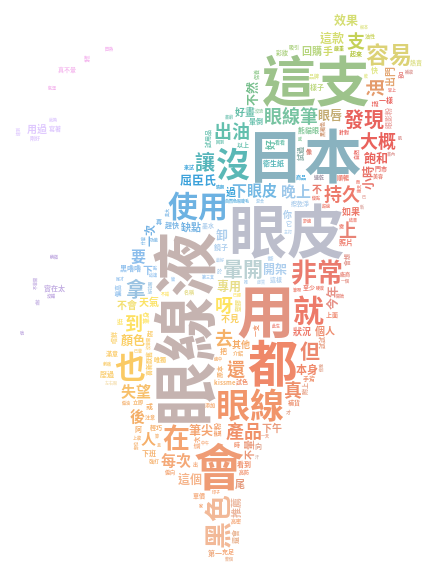

In [5]:
mask_path = "map.jpg"
mask = np.array(Image.open(mask_path))
wc = WordCloud(
    font_path = "NotoSansCJKtc-Bold.otf",
    background_color = "white",
    max_words = 5000,
    mask = mask,
    collocations=False
)
wc.generate(full_text)
color = ImageColorGenerator(mask)
wc.recolor(color_func = color)
wc.to_file("眼_cloud.png")
wc.to_image()